In [1]:
import uproot
import awkward as ak
import numpy as np
import time
import vector
vector.register_awkward()
import matplotlib.pyplot as plt
import hist

In [2]:
ttbar1 = uproot.open(("05f82f85-7cf4-49d5-9537-ff5183d1d636.root"))["Events"]

In [3]:
arraytt1 = ttbar1.arrays()

In [4]:
tt1muon = ak.zip({
    "pt": arraytt1.Muon_pt,
    "eta": arraytt1.Muon_eta,
    "phi": arraytt1.Muon_phi,
    "mass": arraytt1.Muon_mass,
    "charge": arraytt1.Muon_charge
}, with_name="Momentum4D")


In [5]:
tt1pair = ak.combinations(tt1muon, 2)
tt1pair1, tt1pair2 = ak.unzip(tt1pair)
tt_os = (tt1pair1.charge + tt1pair2.charge) == 0

In [6]:
tt1_z_cand = tt1pair1[tt_os] + tt1pair2[tt_os]

In [7]:
tt1_z_mass = tt1_z_cand.mass
flat_tt1_mass = ak.flatten(tt1_z_mass)

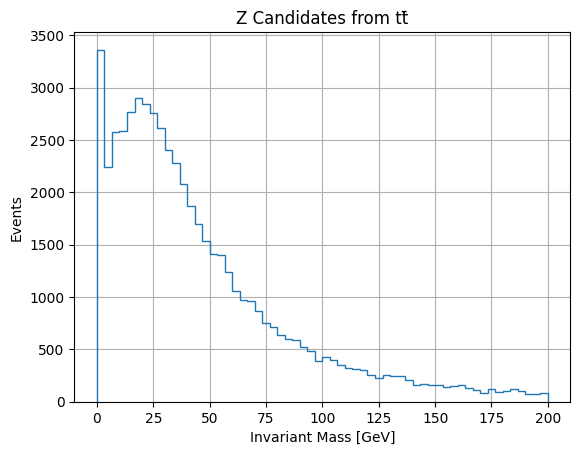

In [8]:
plt.hist(flat_tt1_mass, bins=60, range=(0, 200), histtype="step")
plt.xlabel("Invariant Mass [GeV]")
plt.ylabel("Events")
plt.title("Z Candidates from tt̄")
plt.grid(True)
plt.show()

In [9]:
jet_mask = (arraytt1.Jet_pt > 30) & (abs(arraytt1.Jet_eta) < 2.5)

In [10]:
tt1jets = ak.zip({"pt": arraytt1.Jet_pt,
                "eta": arraytt1.Jet_eta, 
                "phi": arraytt1.Jet_phi, 
                "mass": arraytt1.Jet_mass,
                "btag": arraytt1.Jet_btagDeepFlavB}, 
                with_name="Momentum4D")

In [11]:
sortedtt1jets = tt1jets[ak.argsort(tt1jets.pt, axis = -1, ascending=False)]
sortedtt1jets = sortedtt1jets[ak.num(sortedtt1jets) >= 2]

In [12]:
tt1_lead = sortedtt1jets[:, 0]
tt1_sub = sortedtt1jets[:, 1]

In [13]:
flat_tt1_pt = ak.flatten(tt1_z_cand.pt)
flat_tt1_phi = ak.flatten(tt1_z_cand.phi)
flat_tt1_eta = ak.flatten(tt1_z_cand.eta)

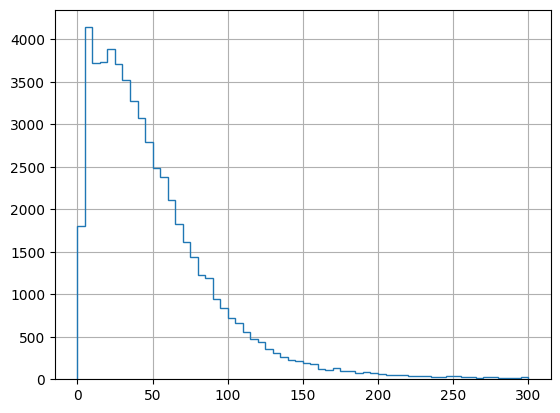

In [14]:
plt.hist(flat_tt1_pt, bins=60, range=(0,300), histtype="step")
plt.grid(True)
plt.show()

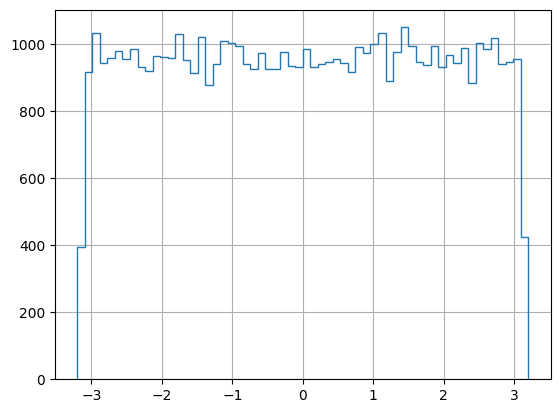

In [15]:
plt.hist(flat_tt1_phi, bins=60, range=(-3.2,3.2), histtype="step")
plt.grid(True)
plt.show()

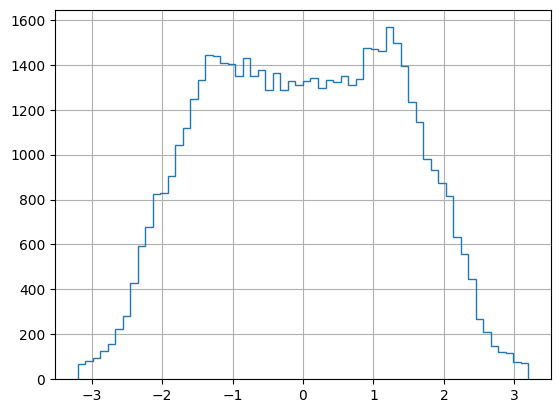

In [16]:
plt.hist(flat_tt1_eta, bins=60, range=(-3.2,3.2), histtype="step")
plt.grid(True)
plt.show()

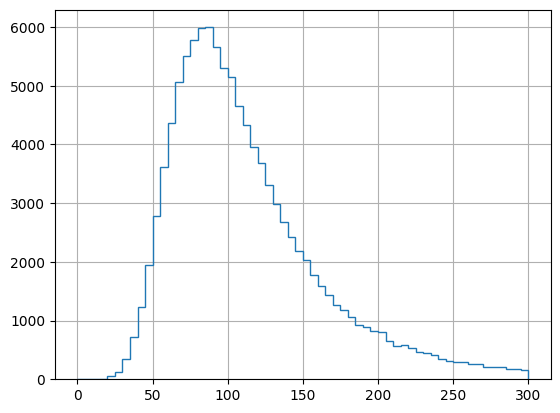

In [17]:
plt.hist(tt1_lead.pt, bins=60, range=(0,300), histtype="step")
plt.grid(True)
plt.show()

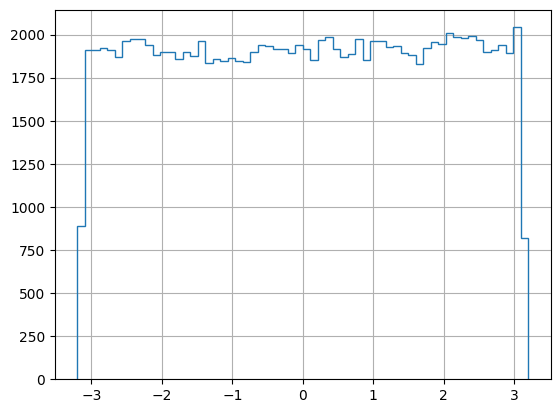

In [18]:
plt.hist(tt1_lead.phi, bins=60, range=(-3.2,3.2), histtype="step")
plt.grid(True)
plt.show()

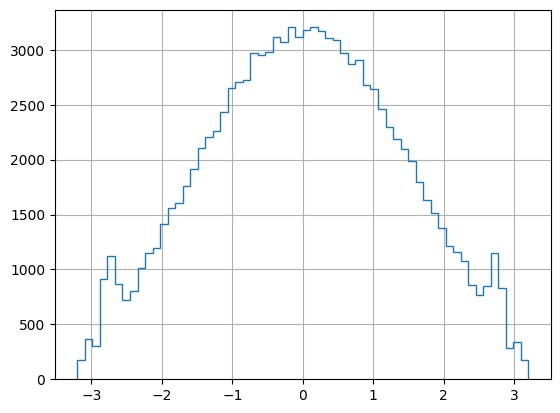

In [19]:
plt.hist(tt1_lead.eta, bins=60, range=(-3.2,3.2), histtype="step")
plt.grid(True)
plt.show()

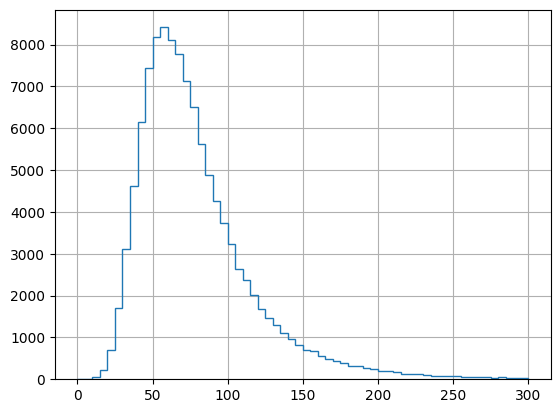

In [20]:
plt.hist(tt1_sub.pt, bins=60, range=(0,300), histtype="step")
plt.grid(True)
plt.show()

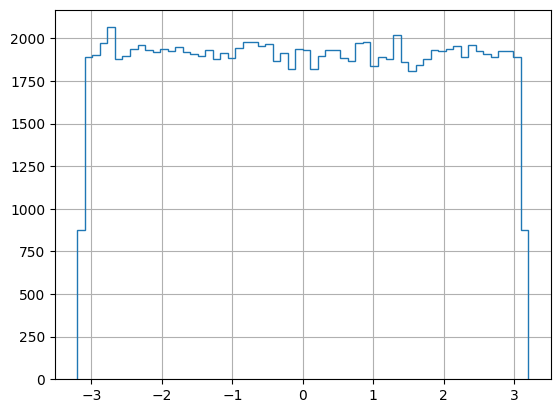

In [21]:
plt.hist(tt1_sub.phi, bins=60, range=(-3.2,3.2), histtype="step")
plt.grid(True)
plt.show()

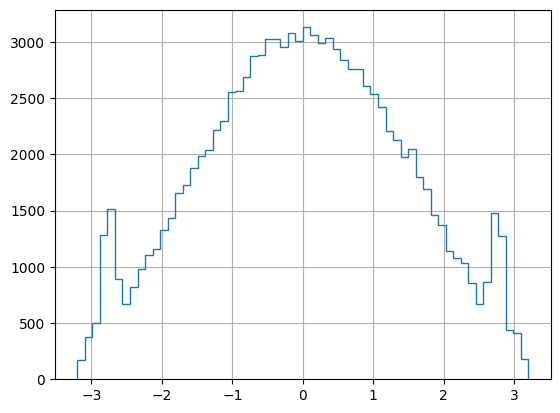

In [22]:
plt.hist(tt1_sub.eta, bins=60, range=(-3.2,3.2), histtype="step")
plt.grid(True)
plt.show()

In [23]:
jet_btag = arraytt1.Jet_btagDeepFlavB
btag_score = jet_btag[jet_mask]
n_btagged = ak.sum(btag_score > 0.277, axis = 1)

In [24]:
z_mask = (tt1_z_cand.pt > 25) & (abs(tt1_z_cand.eta) < 2.5) & (n_btagged == 0)

In [25]:
jet_mask2 = jet_mask & (n_btagged == 0)

In [26]:
R2Jets = tt1jets[jet_mask2]
R2_z_cand = tt1_z_cand[z_mask]

In [27]:
sortedtt1R2jets = R2Jets[ak.argsort(R2Jets.pt, axis=1 , ascending=False)]
sortedtt1R2jets = sortedtt1R2jets[ak.num(sortedtt1R2jets) >= 2]

In [28]:
lead_R2 = sortedtt1R2jets[:, 0]
sub_R2 = sortedtt1R2jets[:, 1]

In [29]:
flat_r2_z_pt = ak.flatten(R2_z_cand.pt)
flat_r2_z_phi = ak.flatten(R2_z_cand.phi)
flat_r2_z_eta = ak.flatten(R2_z_cand.eta)
flat_r2_z_mass = ak.flatten(R2_z_cand.mass)

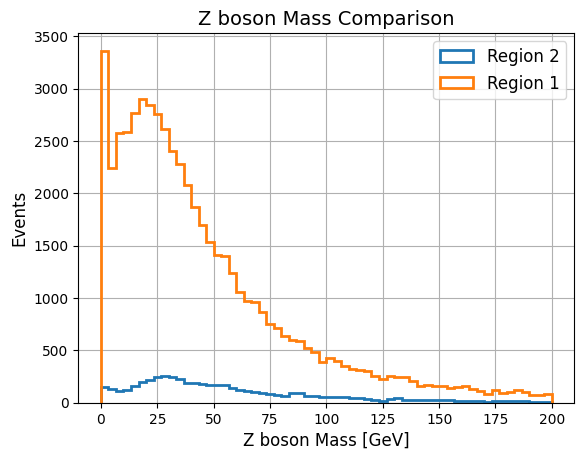

In [30]:
plt.hist(flat_r2_z_mass, bins=60, range=(0,200), histtype="step", linewidth=2, label="Region 2")
plt.hist(flat_tt1_mass, bins=60, range=(0,200), histtype="step", linewidth=2, label='Region 1')
plt.grid(True)
plt.xlabel("Z boson Mass [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Z boson Mass Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

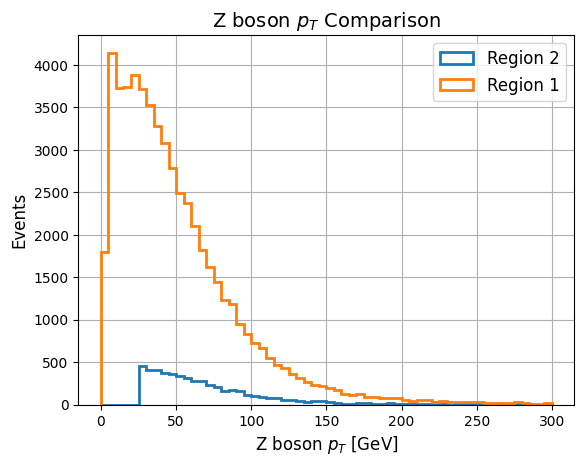

In [31]:
plt.hist(flat_r2_z_pt, bins=60, range=(0,300), histtype="step", linewidth=2, label="Region 2")
plt.hist(flat_tt1_pt, bins=60, range=(0,300), histtype="step", linewidth=2, label='Region 1')
plt.grid(True)
plt.xlabel("Z boson $p_T$ [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Z boson $p_T$ Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

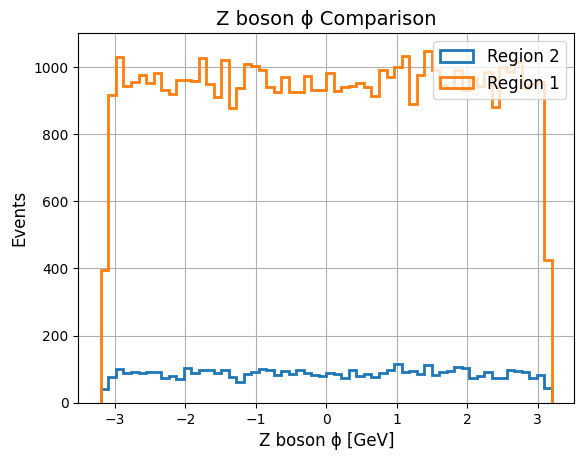

In [32]:
plt.hist(flat_r2_z_phi, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label="Region 2")
plt.hist(flat_tt1_phi, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label='Region 1')
plt.grid(True)
plt.xlabel("Z boson ϕ [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Z boson ϕ Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

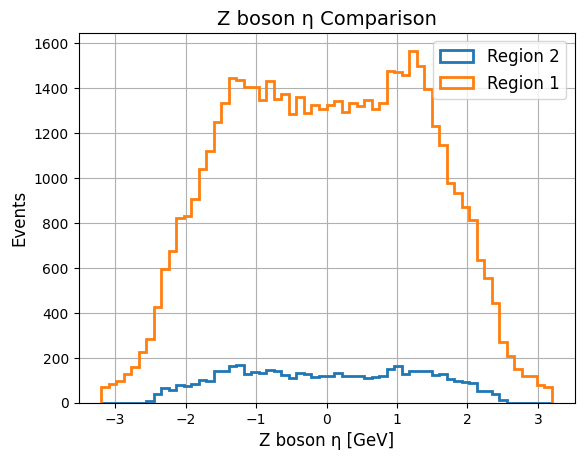

In [33]:
plt.hist(flat_r2_z_eta, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label="Region 2")
plt.hist(flat_tt1_eta, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label='Region 1')
plt.grid(True)
plt.xlabel("Z boson η [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Z boson η Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

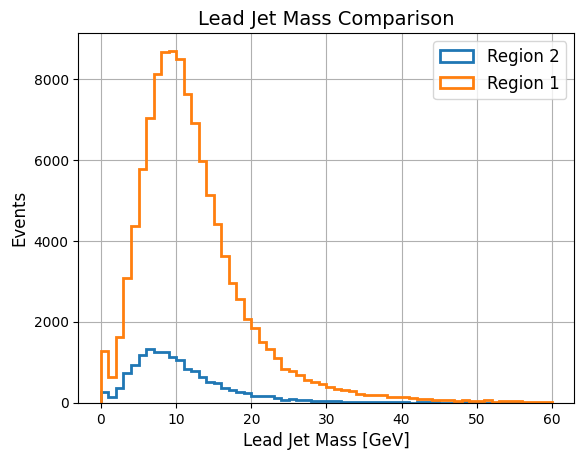

In [34]:
plt.hist(lead_R2.mass, bins=60, range=(0,60), histtype="step", linewidth=2, label="Region 2")
plt.hist(tt1_lead.mass, bins=60, range=(0,60), histtype="step", linewidth=2, label='Region 1')
plt.grid(True)
plt.xlabel("Lead Jet Mass [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Lead Jet Mass Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

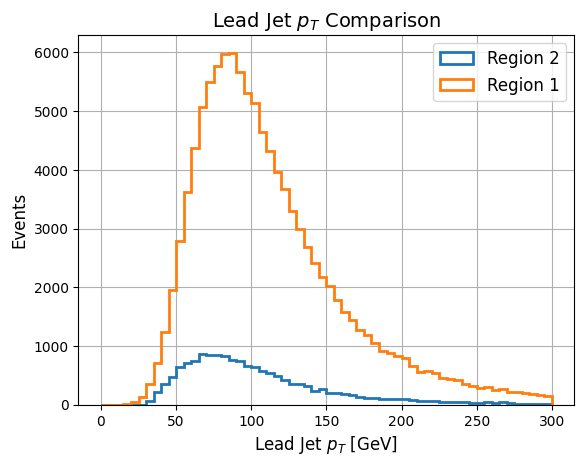

In [35]:
plt.hist(lead_R2.pt, bins=60, range=(0,300), histtype="step", linewidth=2, label="Region 2")
plt.hist(tt1_lead.pt, bins=60, range=(0,300), histtype="step", linewidth=2, label='Region 1')
plt.grid(True)
plt.xlabel("Lead Jet $p_T$ [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Lead Jet $p_T$ Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

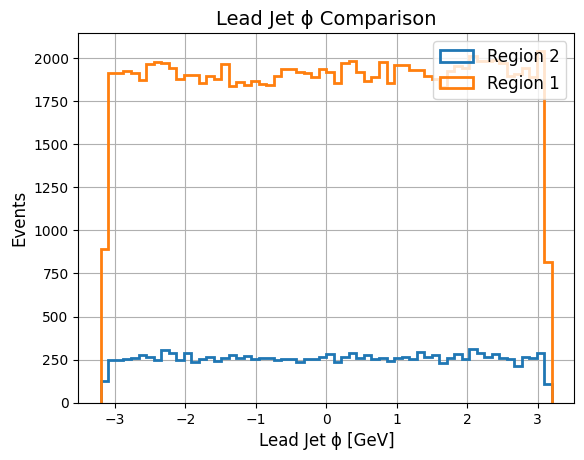

In [36]:
plt.hist(lead_R2.phi, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label="Region 2")
plt.hist(tt1_lead.phi, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label='Region 1')
plt.grid(True)
plt.xlabel("Lead Jet ϕ [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Lead Jet ϕ Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

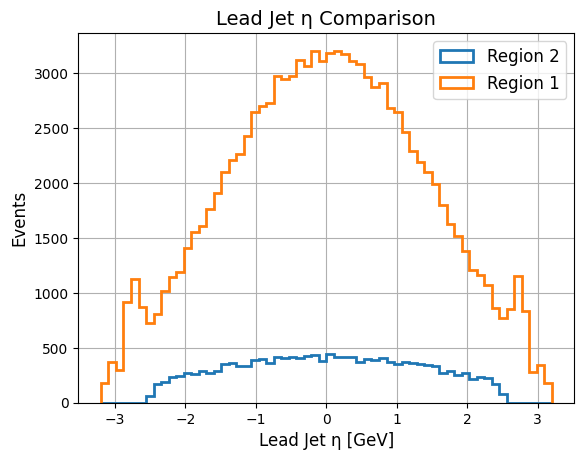

In [37]:
plt.hist(lead_R2.eta, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label="Region 2")
plt.hist(tt1_lead.eta, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label='Region 1')
plt.grid(True)
plt.xlabel("Lead Jet η [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Lead Jet η Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

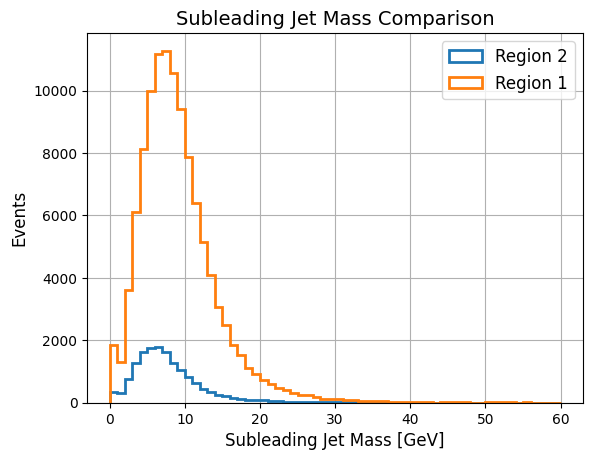

In [38]:
plt.hist(sub_R2.mass, bins=60, range=(0,60), histtype="step", linewidth=2, label="Region 2")
plt.hist(tt1_sub.mass, bins=60, range=(0,60), histtype="step", linewidth=2, label='Region 1')
plt.grid(True)
plt.xlabel("Subleading Jet Mass [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Subleading Jet Mass Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

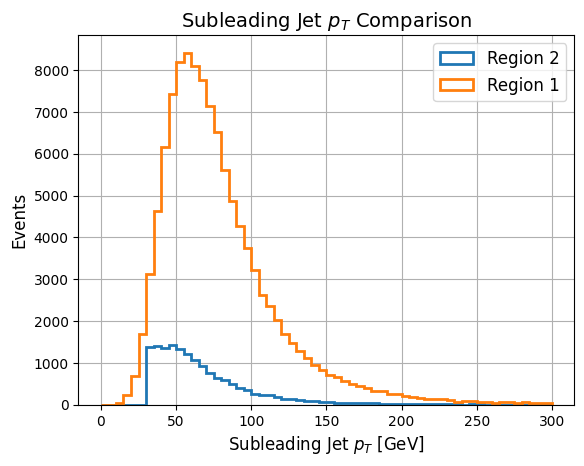

In [39]:
plt.hist(sub_R2.pt, bins=60, range=(0,300), histtype="step", linewidth=2, label="Region 2")
plt.hist(tt1_sub.pt, bins=60, range=(0,300), histtype="step", linewidth=2, label='Region 1')
plt.grid(True)
plt.xlabel("Subleading Jet $p_T$ [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Subleading Jet $p_T$ Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

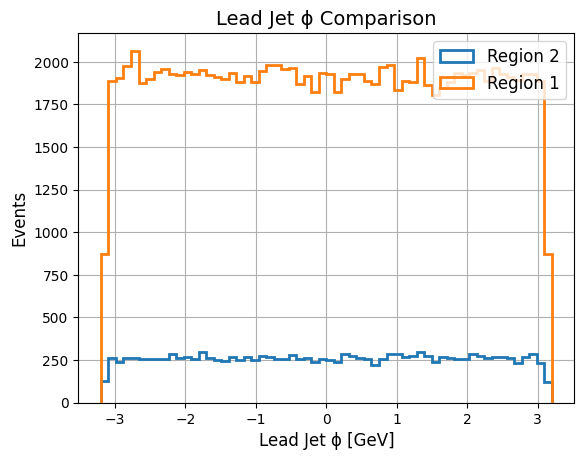

In [40]:
plt.hist(sub_R2.phi, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label="Region 2")
plt.hist(tt1_sub.phi, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label='Region 1')
plt.grid(True)
plt.xlabel("Lead Jet ϕ [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Lead Jet ϕ Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

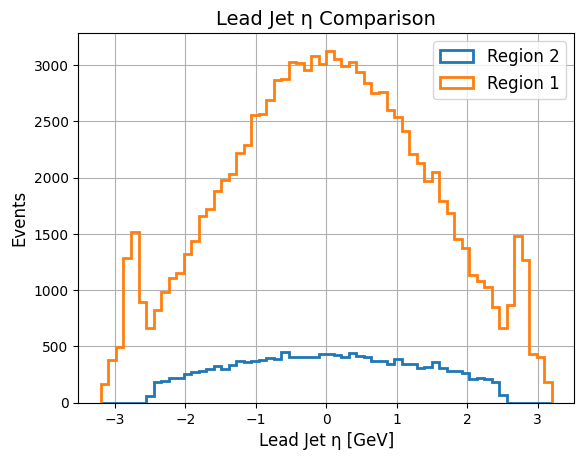

In [41]:
plt.hist(sub_R2.eta, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label="Region 2")
plt.hist(tt1_sub.eta, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label='Region 1')
plt.grid(True)
plt.xlabel("Lead Jet η [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Lead Jet η Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

In [42]:
#-----------------------------------------------------------------------

In [43]:
dy1 = uproot.open(("0e7faeee-6c6a-4c27-b4de-f12e43d83984.root"))["Events"]

In [44]:
arraydy1 = dy1.arrays()

In [45]:
dy1muons = ak.zip({"pt": arraydy1.Muon_pt,
                "eta": arraydy1.Muon_eta, 
                "phi": arraydy1.Muon_phi, 
                "mass": arraydy1.Muon_mass,
                "charge": arraydy1.Muon_charge}, 
                with_name="Momentum4D")

In [46]:
pairdy1 = ak.combinations(dy1muons, 2)
dy1pair1 , dy1pair2 = ak.unzip(pairdy1)

In [47]:
dy1_os = (dy1pair1.charge + dy1pair2.charge) == 0

In [48]:
dy1_z_cand = dy1pair1[dy1_os] + dy1pair2[dy1_os]

In [49]:
dy1_z_mass = dy1_z_cand.mass
dy1_z_pt = dy1_z_cand.pt
dy1_z_phi = dy1_z_cand.phi
dy1_z_eta = dy1_z_cand.eta

In [50]:
flatdy1_mass = ak.flatten(dy1_z_mass)
flatdy1_pt = ak.flatten(dy1_z_pt)
flatdy1_phi = ak.flatten(dy1_z_phi)
flatdy1_eta = ak.flatten(dy1_z_eta)

In [51]:
dy1_jet_mask = arraydy1.Jet_pt > 30 & abs(arraydy1.Jet_eta < 2.5)

In [52]:
dy1jetsR1 = ak.zip({"pt": arraydy1.Jet_pt[dy1_jet_mask],
                "eta": arraydy1.Jet_eta[dy1_jet_mask], 
                "phi": arraydy1.Jet_phi[dy1_jet_mask], 
                "mass": arraydy1.Jet_mass[dy1_jet_mask],
                "btag": arraydy1.Jet_btagDeepFlavB[dy1_jet_mask]}, 
                with_name="Momentum4D")

In [53]:
sortedy1jets = dy1jetsR1[ak.argsort(dy1jetsR1.pt, axis = -1, ascending=False)]
sortedy1jets = sortedy1jets[ak.num(sortedy1jets) >= 2]

In [54]:
dy1_R1_leading_jet = sortedy1jets[:, 0]
dy1_R1_subleading_jet = sortedy1jets[:, 1]

In [55]:
z_mask = (dy1_z_cand.pt > 25) & (abs(dy1_z_cand.eta) < 2.5)
z_r2 = dy1_z_cand[z_mask]

In [56]:
jet_mask = (arraydy1.Jet_pt > 30) & (abs(arraydy1.Jet_eta) < 2.5)

In [57]:
jet_btag = arraydy1.Jet_btagDeepFlavB
btag_score = jet_btag[jet_mask]
n_btagged = ak.sum(btag_score > 0.277, axis=1)

In [58]:
n_good_jets = ak.sum(jet_mask, axis=1)

In [59]:
region2_event_mask = (n_good_jets >= 2) & (n_btagged == 0)

In [60]:

jets_all = ak.zip({
    "pt": arraydy1.Jet_pt,
    "eta": arraydy1.Jet_eta,
    "phi": arraydy1.Jet_phi,
    "mass": arraydy1.Jet_mass,
    "btag": arraydy1.Jet_btagDeepFlavB
}, with_name="Momentum4D")


jets_selected = jets_all[jet_mask]

jets_r2 = jets_selected[region2_event_mask]


In [87]:
sorted_jets_r2 = jets_r2[ak.argsort(jets_r2.pt, axis=-1, ascending=False)]
leading_r2 = sorted_jets_r2[:, 0]
sub_r2 = sorted_jets_r2[:,1]

In [62]:
flat_z_r2 = ak.flatten(z_r2)
flat_z_r1 = ak.flatten(dy1_z_cand)

In [63]:
#-------------------------------------------------------------

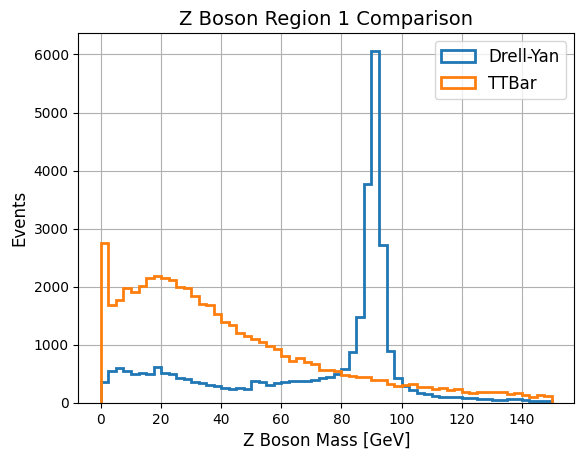

In [64]:
#ttbar1-dy1
#z mass
plt.hist(flatdy1_mass, bins=60, range=(0,150), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(flat_tt1_mass, bins=60, range=(0,150), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("Z Boson Mass [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Z Boson Region 1 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

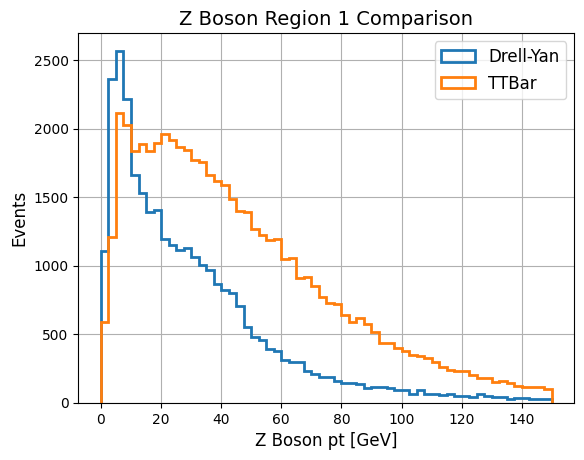

In [65]:
plt.hist(flatdy1_pt, bins=60, range=(0,150), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(flat_tt1_pt, bins=60, range=(0,150), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("Z Boson pt [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Z Boson Region 1 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

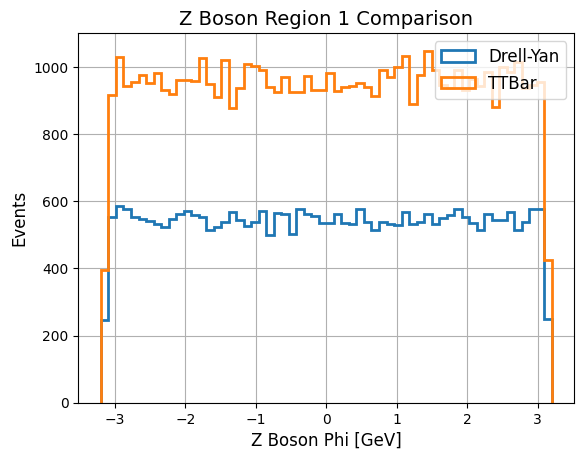

In [66]:
plt.hist(flatdy1_phi, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(flat_tt1_phi, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("Z Boson Phi [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Z Boson Region 1 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

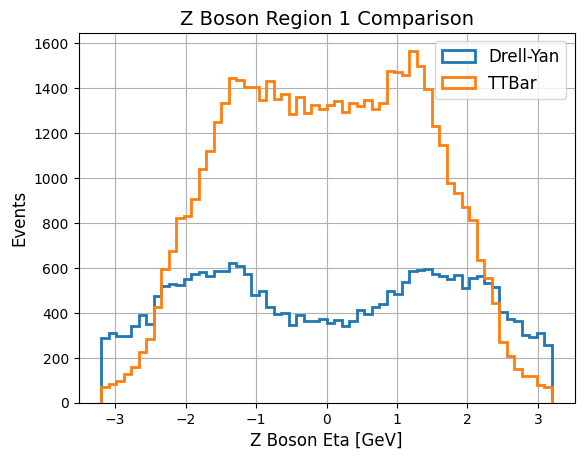

In [67]:
plt.hist(flatdy1_eta, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(flat_tt1_eta, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("Z Boson Eta [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Z Boson Region 1 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

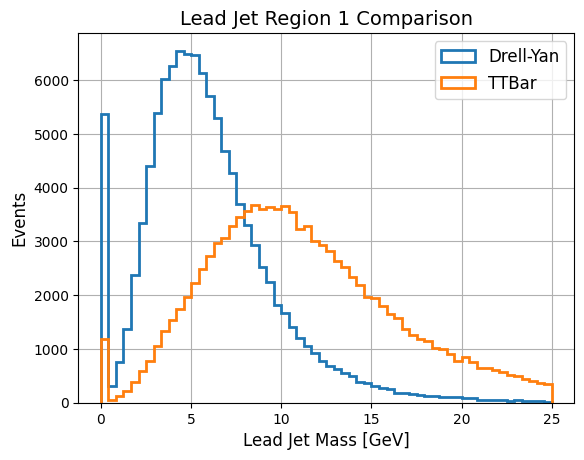

In [68]:
plt.hist(dy1_R1_leading_jet.mass, bins=60, range=(0,25), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(tt1_lead.mass, bins=60, range=(0,25), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("Lead Jet Mass [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Lead Jet Region 1 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

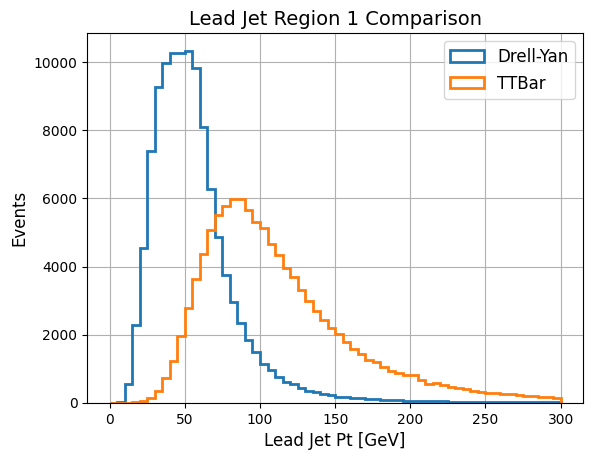

In [69]:
plt.hist(dy1_R1_leading_jet.pt, bins=60, range=(0,300), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(tt1_lead.pt, bins=60, range=(0,300), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("Lead Jet Pt [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Lead Jet Region 1 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

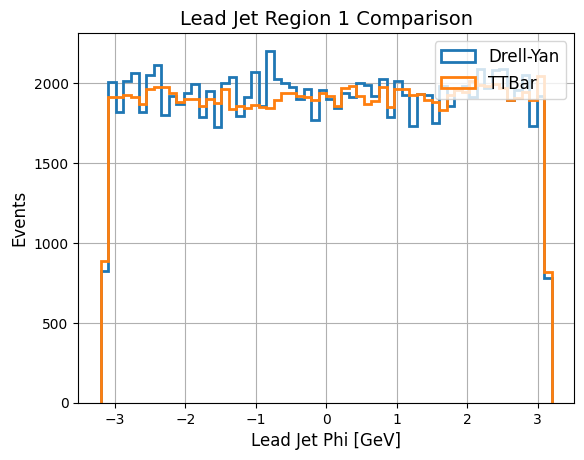

In [70]:
plt.hist(dy1_R1_leading_jet.phi, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(tt1_lead.phi, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("Lead Jet Phi [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Lead Jet Region 1 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

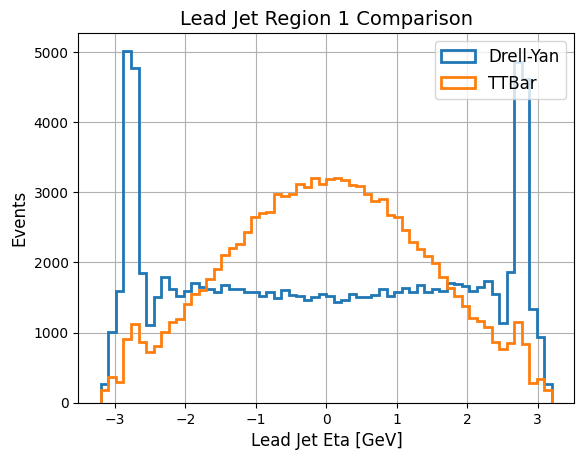

In [71]:
plt.hist(dy1_R1_leading_jet.eta, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(tt1_lead.eta, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("Lead Jet Eta [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Lead Jet Region 1 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

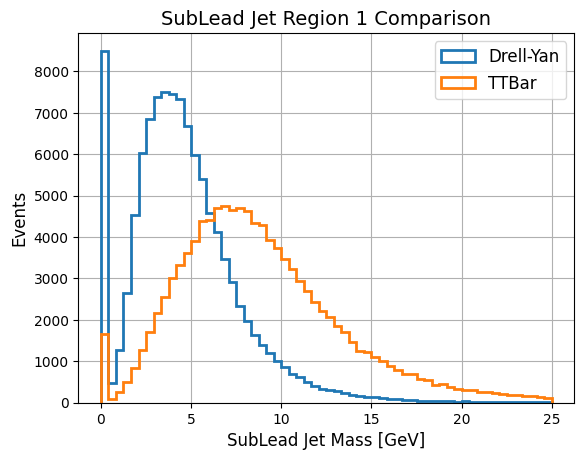

In [72]:
plt.hist(dy1_R1_subleading_jet.mass, bins=60, range=(0,25), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(tt1_sub.mass, bins=60, range=(0,25), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("SubLead Jet Mass [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("SubLead Jet Region 1 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

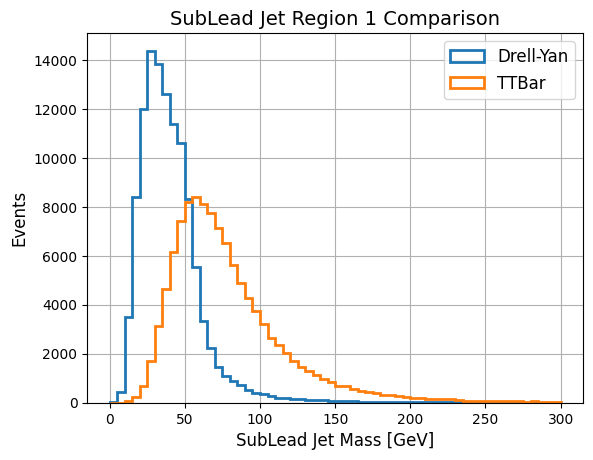

In [73]:
plt.hist(dy1_R1_subleading_jet.pt, bins=60, range=(0,300), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(tt1_sub.pt, bins=60, range=(0,300), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("SubLead Jet Mass [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("SubLead Jet Region 1 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

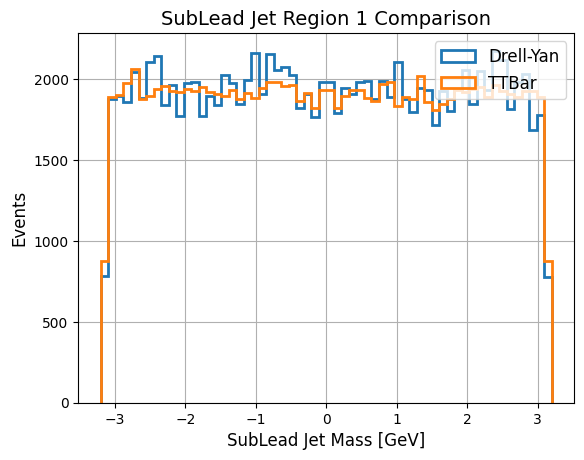

In [74]:
plt.hist(dy1_R1_subleading_jet.phi, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(tt1_sub.phi, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("SubLead Jet Mass [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("SubLead Jet Region 1 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

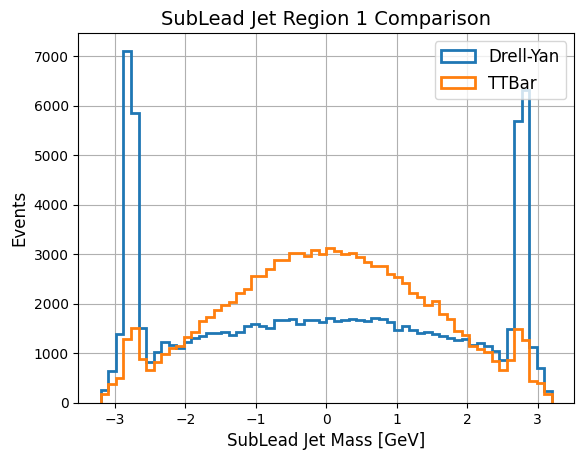

In [75]:
plt.hist(dy1_R1_subleading_jet.eta, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(tt1_sub.eta, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("SubLead Jet Mass [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("SubLead Jet Region 1 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

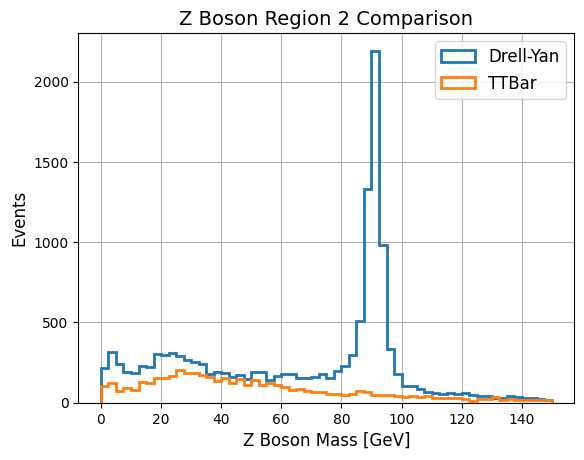

In [80]:
plt.hist(flat_z_r2.mass, bins=60, range=(0,150), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(flat_r2_z_mass, bins=60, range=(0,150), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("Z Boson Mass [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Z Boson Region 2 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

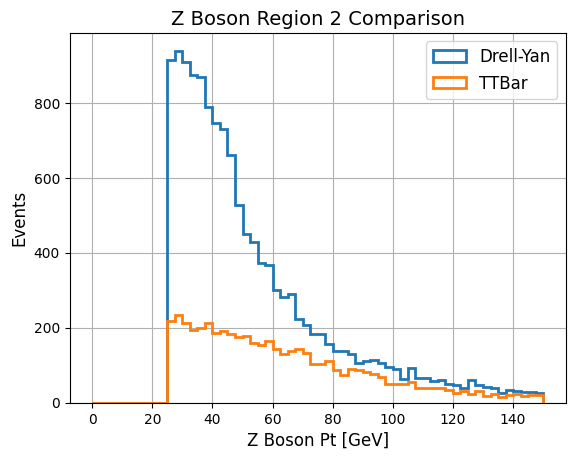

In [82]:
plt.hist(flat_z_r2.pt, bins=60, range=(0,150), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(flat_r2_z_pt, bins=60, range=(0,150), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("Z Boson Pt [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Z Boson Region 2 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

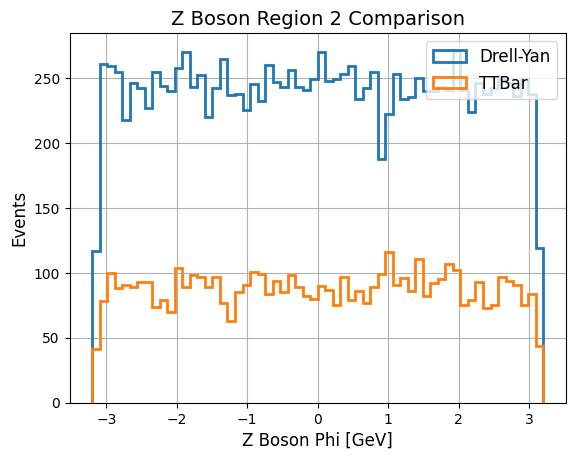

In [84]:
plt.hist(flat_z_r2.phi, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(flat_r2_z_phi, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("Z Boson Phi [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Z Boson Region 2 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

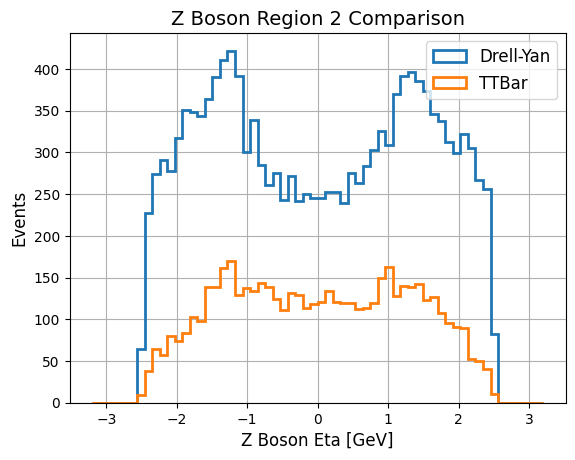

In [85]:
plt.hist(flat_z_r2.eta, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(flat_r2_z_eta, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("Z Boson Eta [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Z Boson Region 2 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

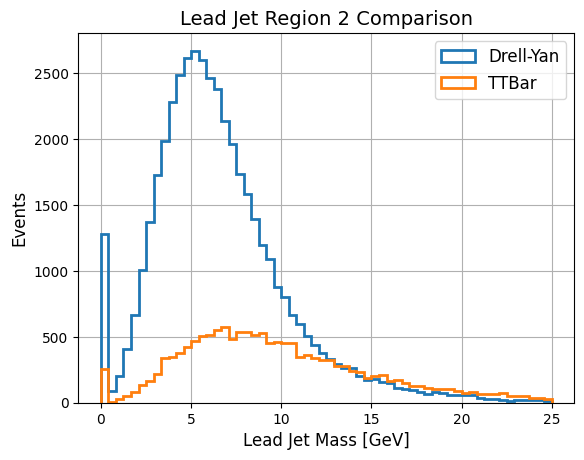

In [88]:
plt.hist(leading_r2.mass, bins=60, range=(0,25), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(lead_R2.mass, bins=60, range=(0,25), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("Lead Jet Mass [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Lead Jet Region 2 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

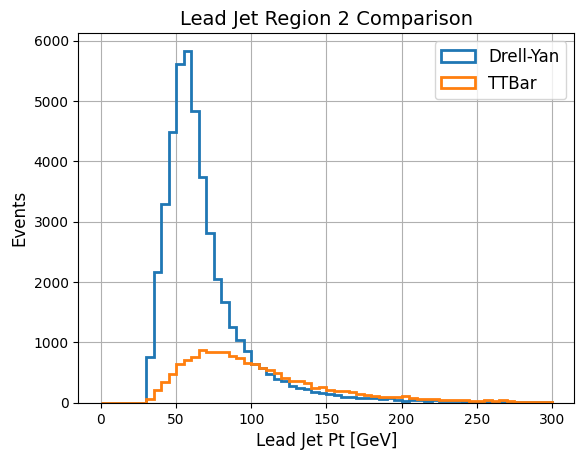

In [93]:
plt.hist(leading_r2.pt, bins=60, range=(0,300), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(lead_R2.pt, bins=60, range=(0,300), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("Lead Jet Pt [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Lead Jet Region 2 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

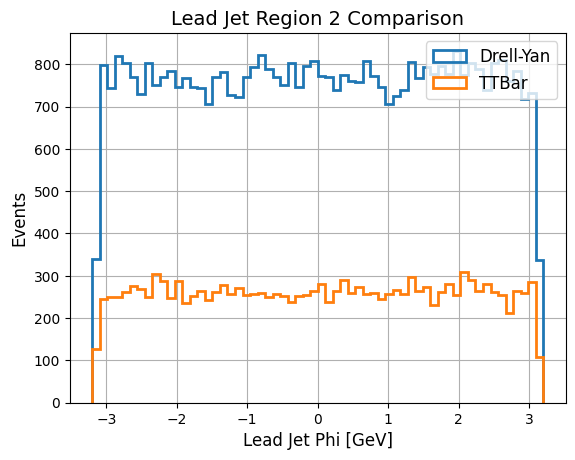

In [94]:
plt.hist(leading_r2.phi, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(lead_R2.phi, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("Lead Jet Phi [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Lead Jet Region 2 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

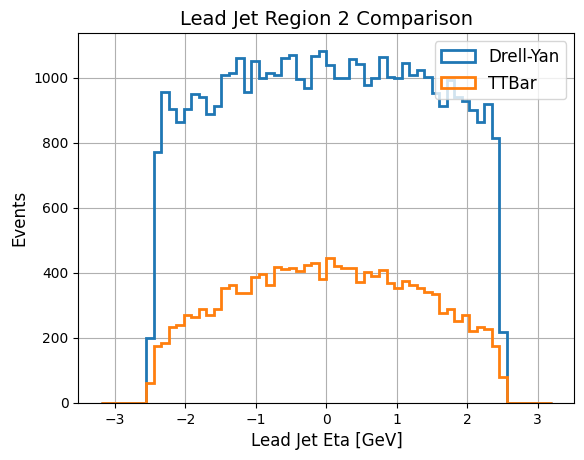

In [96]:
plt.hist(leading_r2.eta, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(lead_R2.eta, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("Lead Jet Eta [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Lead Jet Region 2 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

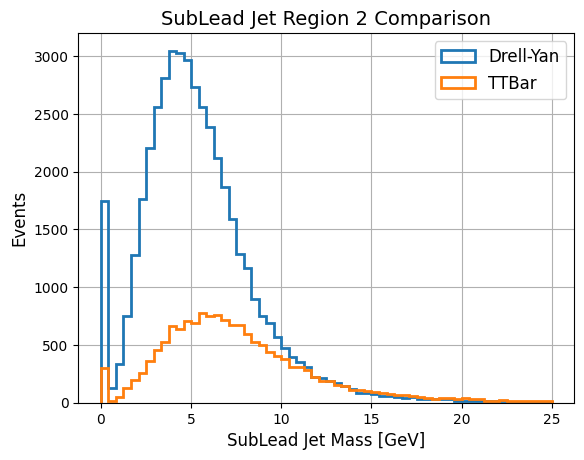

In [99]:
plt.hist(sub_r2.mass, bins=60, range=(0,25), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(sub_R2.mass, bins=60, range=(0,25), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("SubLead Jet Mass [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("SubLead Jet Region 2 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

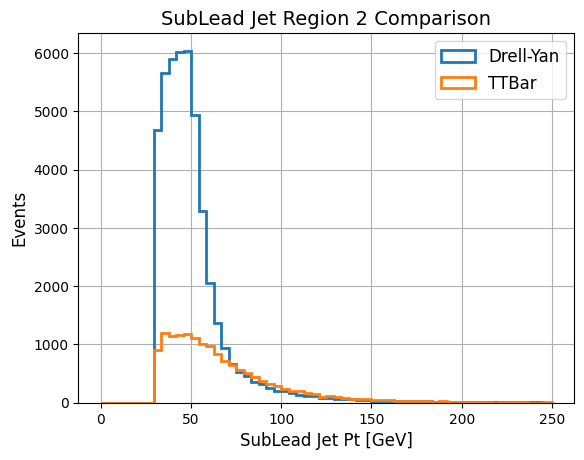

In [100]:
plt.hist(sub_r2.pt, bins=60, range=(0,250), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(sub_R2.pt, bins=60, range=(0,250), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("SubLead Jet Pt [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("SubLead Jet Region 2 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

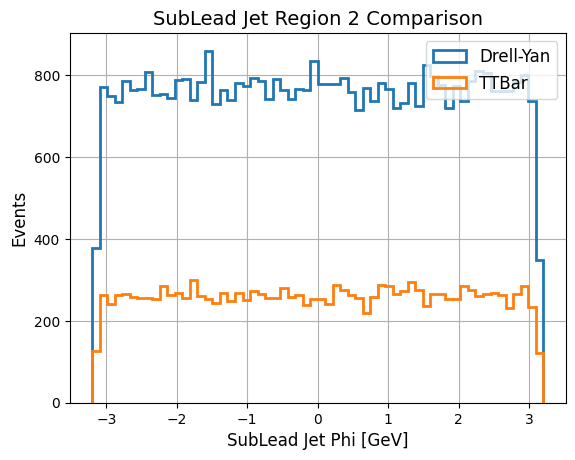

In [101]:
plt.hist(sub_r2.phi, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(sub_R2.phi, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("SubLead Jet Phi [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("SubLead Jet Region 2 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

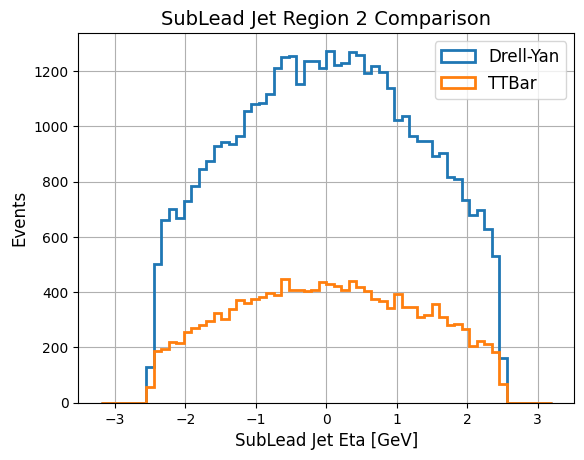

In [102]:
plt.hist(sub_r2.eta, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(sub_R2.eta, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("SubLead Jet Eta [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("SubLead Jet Region 2 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()